<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaIA/8_Aprendizaje_Estadistico/SVM_python_scikitlearn_1.ipynb"><img src='https://colab.research.google.com/assets/colab-badge.svg'/></a>

# Support Vector Machines con Python y Scikit-Learn

Contruiremos una Support Vector Machine para clasificar la estrellas Pulsares.
Los datos utilizados son los de **Predicting a Pulsar Star**, los cuales se tomaron de una competencia de Kaggle.

## Table of Contents


1.	Introducción a Support Vector Machines
2.	Support Vector Machines: intuición
3.	Truco del Kernel
4.	Establecimiento del problema
5.	Descripción de la base de datos
6.	Carga de dependencias (módulos)
7.	Carga de datos
8.	Análisis exploratorio de datos
9.	Establecimiento de características y variable objetivo
10.	Separación de datos para entrenamiento y pruebas
11.	Estandarización de características
12.	Ejecución de SVM with linear kernel
13.	Matriz de confusión
14.	Métricas de clasificación


## 1. Introducción a Support Vector Machines

Las Máquinas de vectores de soporte (**Support Vector Machines**, abreviado SVM) son algoritmos de ML utilizados para clasificación, regresión, detección de outliers. Puede utilizarse para asignar categorias a puntos, convirtiendolo en un clasificador no probabilista.

La idea original del algoritmo fue desarrollada por Vladimir N Vapnik and Alexey Ya. Chervonenkis en 1963. En 1992, Bernhard E. Boser, Isabelle M Guyon y Vladimir N Vapnik, sugirieron el uso de kernels para que el modelo fuera no lineal. El algoritmo actual lo propusieron Corinna Cortes y Vapnik en 1993 (lo publicaron hasta 1995).



## 2. Support Vector Machines: Intuición

Veamos terminología útil.

### Hiperplano (Hyperplane)

Será una frontera de decisión que separará puntos dados que tengan diferentes clases como etiquetas. SVM utiliza un hiperplano para separar los puntos, lo hará utilizando un margen lo mas grande posible. El hiperplano es conocido como **maximum margin hyperplane** y el clasificador que construye se llama **maximum margin classifier**.

### Vectores de soporte (Support Vectors)

Son los puntos, de nuestra muestra de datos, que están mas cerca del hiperplano. Estos puntos definiran la linea de separación o hiperplano al calcular los márgenes.


### Margen (Margin)

El margen es la separación que existe entre las 2 lineas mas cercanas entre los vectores de soporte. Se calcula como la distancia perpendicular entre el hiperplano y los vectores de soporte. Se intenta maximizar la separación para obtener el margen maximo.


### Problema con datos dispersos

Algunas veces, los puntos de nuestros datos están dispersos, por lo que no es posible separarlos utilizando un hiperplano. En esta situación es conveniente utilizar el "truco del kernel" para transformar nuestros puntos a que vivan en un espacio de dimensión mayor en el cual si podamos crear un hiperplano que los separe.


## 3. Truco del Kernel

En la práctica, SVM se implementa utilizando un **kernel**. En palabras sencillas, un kernel es una función que mapea los datos a un espacio de dimensión mayor.

Hay 4 kernels muy populares en SVM:

- Lineal
- Polinomial
- RBF (Radial Basis Function, o kernel Gaussiano)
- Sigmoide

En esta primer clase solo utilizaremos el **kernel Lineal**.

## 4. Establecimiento del problema

Se tendrán datos de estrellas pulsares, en el cual habrá algunas que son `legitimas` y otras que son `falsas`. La legitimas son minoria entre los datos.




## 5. Descripción de la base de datos

El dataset utilizado es el usado en una competencia de Kaggle.

Oficialmente, los datos proveienen de:
https://archive.ics.uci.edu/ml/datasets/HTRU2

También se encuentran en (descarga sencilla para este notebook): 
https://github.com/LauraWen/pulsar-star-data-analysis

Pueden encontrarse algunos datos actualizados en:
https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

Los pulsares son un tipo de Estrella de Neutrones que produce una emision de radio detectable por la tierra. Tienen interes científico (estados de la materia, pruebas en la relación espacio-tiempo, etc). 

Los datos utilizados en este notebook contienen 16,259 ejemplos de estrellas **falsas** y 1,639 **legitimas**. Las etiquetas de las clases son 0 (negativa) y 1 (positiva).

### Características:

Cada muestra es descrita por 8 carácteristicas que son variables continuas y una variable discreta que describe la clase de la muestra. Las primeras 4 características corresponden a estadísticos obtenidos de un perfil integrado del pulsar. Las otras 4 variables continuas son obtenidas de la curva DM-SNR.

Resumidas: 

1. Mean of the integrated profile.

2. Standard deviation of the integrated profile.

3. Excess kurtosis of the integrated profile.

4. Skewness of the integrated profile.

5. Mean of the DM-SNR curve.

6. Standard deviation of the DM-SNR curve.

7. Excess kurtosis of the DM-SNR curve.

8. Skewness of the DM-SNR curve.

9. Class

## 6. Carga de dependencias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

## 7. Carga de datos

In [ ]:
# Alternativa para cuando está cargado en drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/LauraWen/pulsar-star-data-analysis/master/pulsar_stars.csv')

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## 8. Análisis exploratorio de datos

In [ ]:
# Dimensión del dataset
df.shape

(17898, 9)

In [ ]:
# Vistazo al dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
# Ver nombres de las columnas del DataFrame

col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

¿Hay algo raro en los nombres de las columnas?

In [ ]:
# Remover espacios de sobra

df.columns = df.columns.str.strip()

In [ ]:
# Revisión a cambio de nombre de columnas

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [ ]:
# Abreviación

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [ ]:
# Revisión

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

IP viene de `integrated profile` y DM-SNR es por `delta modulation and signal to noise ratio`. 

Nuestra variable objetivo es la columna `target_class`. Veamos su distribución.

In [ ]:
# Distribución de clases

df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [ ]:
# Porcentual

df['target_class'].value_counts()/np.float(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

Estamos ante un problema de desbalance de clases

In [ ]:
# Resumen del DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


### Buscando valores nulos

In [ ]:
# Revisión de valores nulos

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

### Resumen de las variables numéricas


- 9 variables numéricas en el dataset


- 8 son variables continuas y 1 discreta


- No hay valores nulos

### Outliers en variables numéricas

In [ ]:
# Resumen de estadísticos de nuestros datos

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

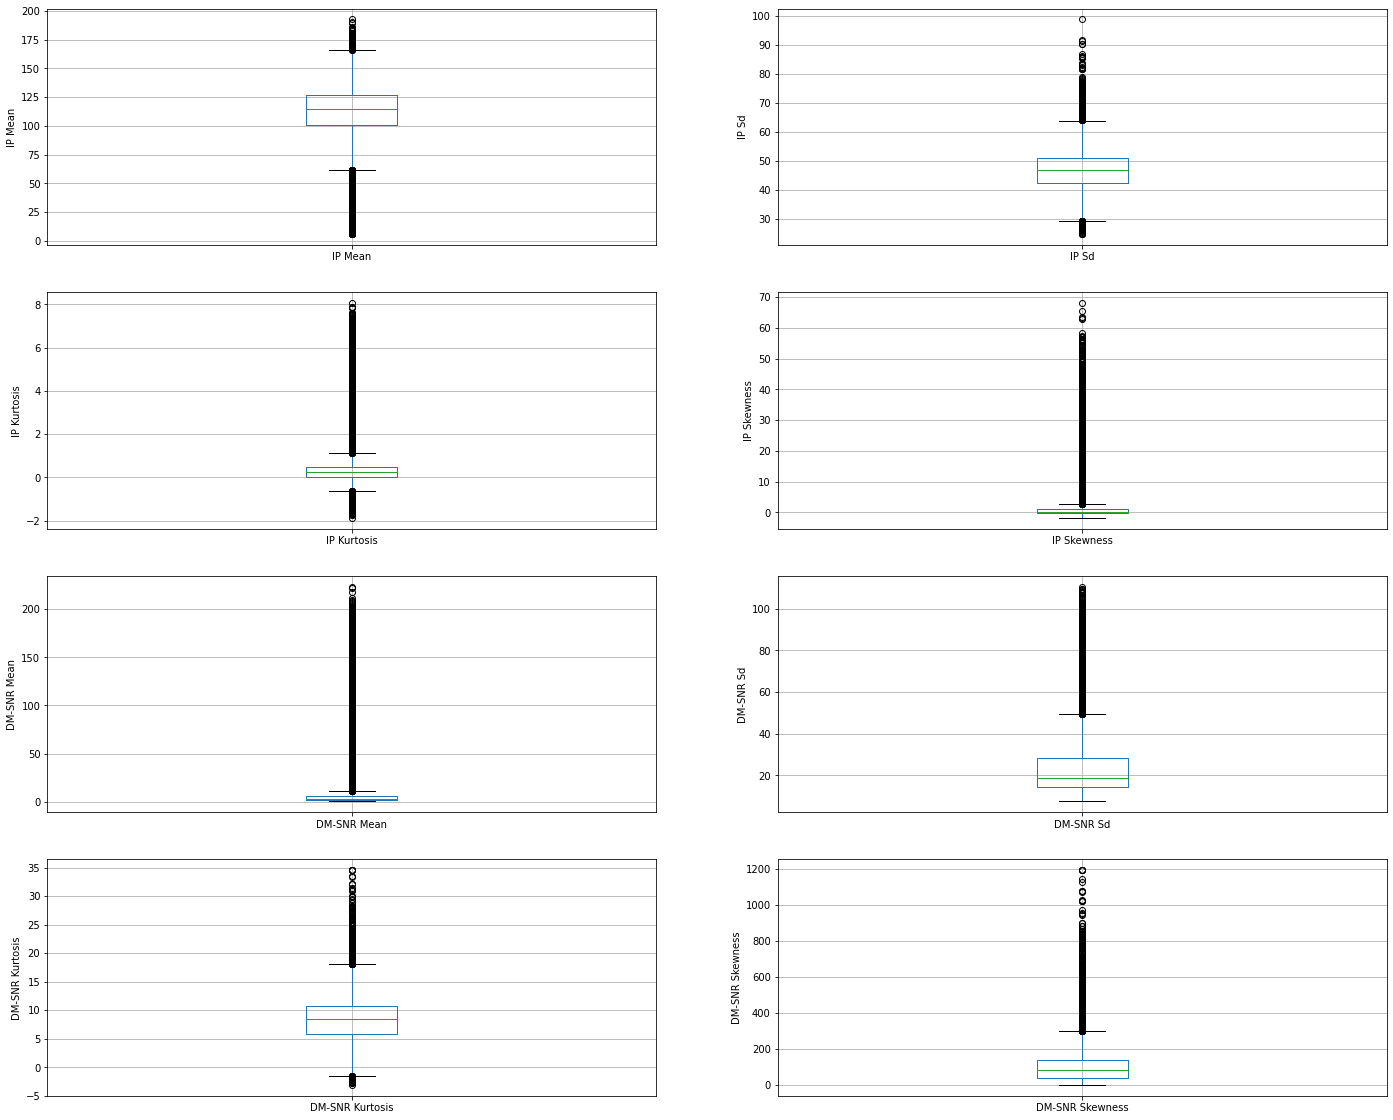

In [ ]:
# Boxplots de los datos

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

### Manejo de outliers con SVM

Hay 2 variantes de SMV. Existe la variante `hard-margin` y la `soft-margin`.


La `hard-margin SVM` no trabaja bien con outliers. Ésta busca clasificar correctamente los puntos utilizados en entrenamiento con un margen de al menos 1.

La otra variante es la `soft-margin`. Esta sacrifica un poco al clasificar algunos puntos con la clase incorrecta, o los clasifica con una margen menor a 1. Pero por cada punto mal clasificado se paga una penalización `C`. Una `baja C` implica que permitimos mas outliers, una `C alta` implica que toleramos menos los outliers.

### Distribución de las variables

Visualización de los histogramas de los datos.

Text(0, 0.5, 'Número de estrellas pulsares')

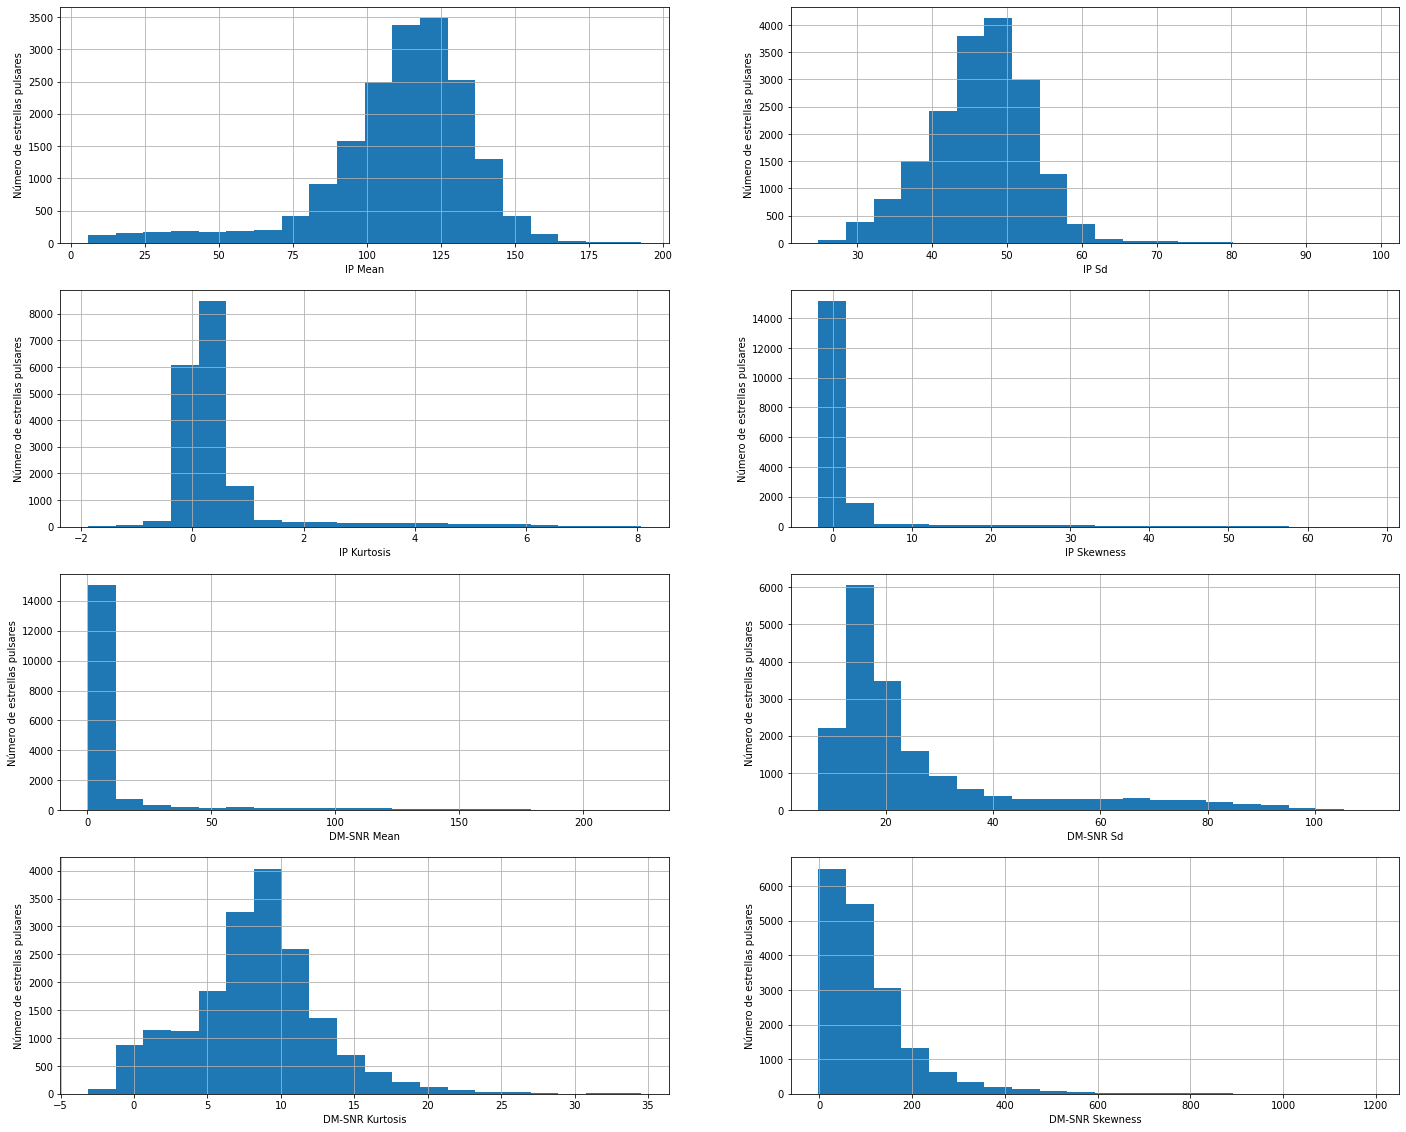

In [ ]:
# Ploteo de los histrogramas de los datos


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Número de estrellas pulsares')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Número de estrellas pulsares')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Número de estrellas pulsares')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Número de estrellas pulsares')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Número de estrellas pulsares')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Número de estrellas pulsares')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Número de estrellas pulsares')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Número de estrellas pulsares')


¿Consideran que las variables están sesgadas?

## 9. Definir las características y la variable objetivo.

In [ ]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

## 10. Separar datos en entrenamiento y pruebas

In [ ]:
# Separar mis datos en características y etiquetas tanto de entrnamiento como de prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Revisión de dimensiones

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

## 11. Estandarización de características

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.986604e-16,-6.735622e-16,1.792879e-17,3.631409e-17,-8.459267e-17,-1.563912e-16,-1.277090e-17,1.172992e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## 12. SVM con kernel lineal


### Ejecución de SVM con C=0.01

In [ ]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# instanciación de objeto SVC
svc=SVC() 

linear_svc001=SVC(kernel='linear', C=.01) 

linear_svc001.fit(X_train, y_train)

y_pred=linear_svc001.predict(X_test)

print('Precisión con kernel lineal y C=0.01 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Precisión con kernel lineal y C=0.01 : 0.9791



### Ejecución de SVM con C=1.0

In [ ]:
linear_svc=SVC(kernel='linear', C=1.0) 

# Ajuste del clasificador a nuestros datos
linear_svc.fit(X_train,y_train)


# predicciones para datos de test (prueba)
y_pred_test=linear_svc.predict(X_test)


print('Precisión con kernel lineal y C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Precisión con kernel lineal y C=1.0 : 0.9830


### Ejecución de SVM con C=100.0

In [ ]:
linear_svc100=SVC(kernel='linear', C=100.0) 

linear_svc100.fit(X_train, y_train)

y_pred=linear_svc100.predict(X_test)

print('Precisión con kernel lineal y C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Precisión con kernel lineal y C=100.0 : 0.9832


### Ejecución de SVM con C=1000.0

In [ ]:
linear_svc1000=SVC(kernel='linear', C=1000.0) 

linear_svc1000.fit(X_train, y_train)

y_pred=linear_svc1000.predict(X_test)

print('Precisión con kernel lineal y C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Precisión con kernel lineal y C=1000.0 : 0.9832


### Comparar precisión en datos de prueba y de entrenamiento

¿Porque hacerlo?

In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print('Precisión en datos de entrenamiento: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Precisión en datos de entrenamiento: 0.9783


### Comparar precisión del modelo con precisión nula.

Tenemos una precisión del modelo cercana a 1, por lo que podríamos creer que el clasificador es muy bueno, pero hay que tener cuidado con esto.

Para esto sirve la precisión nula (**null accuracy**) que se calcula como la precisión si siempre clasificaramos los datos con la clase mas frecuente.

In [ ]:
# Recordemos la distribución de las etiquetas
y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

In [ ]:
# Precisión nula

null_accuracy = (3306/(3306+274))

print('Puntucación de Null accuracy: {0:0.4f}'. format(null_accuracy))

Puntucación de Null accuracy: 0.9235


## 13. Matriz de confusión

La matriz de confusión es una herramienta que nos resume que tan bueno es un algoritmo de clasificación. Da un resumen de las buenas y malas clasificaciones que hizo nuestro modelo.

Hay 4 posibles valores a tener en un modelo de clasificación binaria, se describen abajo.

**Verdaderos Positivos (TP)** – Ocurre cuando predecimos que un elemento pertenece a una clase y lo hizimos correctamente.

**Verdaderos Negativos (TN)** – Ocurre cuando predecimos que un elemento no pertenece a una clase y lo hacemos de modo correcto.

**Falsos Positivos (FP)** – Ocurre cuando predecimos que un elemento pertenece a cierta clase, pero la verdad es que no pertenece. Este error se conoce como **Error de tipo I.**



**Falsos Negativos (FN)** – Ocurren cuando predecimos que un elemento no pertenece a cierta clase, pero la verdad es que si lo hace. Este puede ser un error mas serio, y se conoce como **Error de tipo II.**



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Matriz de confusión\n\n', cm)

print('\nVerdaderos Positivos(TP) = ', cm[0,0])

print('\nVerdaderos Negativos(TN) = ', cm[1,1])

print('\nFalsos Positivos(FP) = ', cm[0,1])

print('\nFalsos Negativos(FN) = ', cm[1,0])

La matriz de confusión muestra `3289 + 230 = 3519 predicciones correctas` and `17 + 44 = 61 predictiones incorrectas`.

En nuestro caso, tenemos:

- `True Positives` (Es Positivo:1 & Predicho Positivo:1) - 3289


- `True Negatives` (Es Negativo:0 & Predicho Negativo:0) - 230


- `False Positives` (Es Negative:0 pero Predicho Positivo:1) - 17 `(Type I error)`


- `False Negatives` (Es Positivo:1 pero Predicho Negativo:0) - 44 `(Type II error)`

In [ ]:
# Ver matriz de confusión como mapa de calor
cm_matrix = pd.DataFrame(data=cm, columns=['Positivo:1', 'Negativo:0'], 
                                 index=['Predicho Positivo:1', 'Predicho Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 14. Métricas de clasificación

### Classification Report


**Classification report** es otro modo de calificar el desempeño de nuestro modelo. Nos muestra  **precision**, **recall**, **f1** y **support** como medidas del modelo.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

### Correctas

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Precisión de la clasificación : {0:0.4f}'.format(classification_accuracy))


### Error

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Error en Classificación : {0:0.4f}'.format(classification_error))


### Precisión (Accuracy)

Matemáticamente, se define como la razón `TP to (TP + FP)`.




In [ ]:
precision = TP / float(TP + FP)


print('Precisión : {0:0.4f}'.format(precision))


### Recall

Matemáticamente, **recall** se define como la proporción `TP to (TP + FN)`.



In [ ]:
recall = TP / float(TP + FN)

print('Recall (o Sensitivity) : {0:0.4f}'.format(recall))

### True Positive Rate


**True Positive Rate** es sinónimo de **Recall**.


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

### Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

### f1-score


**f1-score** la media armónica entre precisión y recall. El mejor valor de  **f1-score** es 1.0 y el peor posible es 0.0. 